In [4]:
# Bibliotecas

import mne
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Funções auxiliares

def generate_sinusoid(dur=1, amp=1, freq=1, phase=0, Fs=100):
    """Generation of sinusoid

    Notebook: PCP_08_signal.ipynb

    Args:
        dur: Duration (in seconds) of sinusoid (Default value = 1)
        amp: Amplitude of sinusoid (Default value = 1)
        freq: Frequency (in Hertz) of sinusoid (Default value = 1)
        phase: Phase (relative to interval [0,1)) of sinusoid (Default value = 0)
        Fs: Sampling rate (in samples per second) (Default value = 100)

    Returns:
        x: Signal
        t: Time axis (in seconds)
    """
    num_samples = int(Fs * dur)
    t = np.arange(num_samples) / Fs
    x = amp * np.sin(2 * np.pi * freq * t - phase)
    return x, t

def sampling_equidistant(x, t, Fs, dur=None):
    """Equidistant sampling of interpolated signal

    Notebook: PCP_08_signal.ipynb

    Args:
        x_1: Signal to be interpolated and sampled
        t_1: Time axis (in seconds) of x_1
        Fs_2: Sampling rate used for equidistant sampling
        dur: Duration (in seconds) of sampled signal (Default value = None)

    Returns:
        x_2: Sampled signal
        t_2: time axis (in seconds) of sampled signal
    """

    if dur is None:
        dur = len(t) * (t[1] - t[0])

    N = int(Fs * dur)
    ts = np.arange(N) / Fs
    xs = np.interp(ts, t, x)

    return xs, ts

def reconstruction_sinc(x, t, t_sinc):
    """Reconstruction from sampled signal using sinc-functions

    Notebook: PCP_08_signal.ipynb

    Args:
        x: Sampled signal
        t: Equidistant discrete time axis (in seconds) of x
        t_sinc: Equidistant discrete time axis (in seconds) of signal to be reconstructed

    Returns:
        x_sinc: Reconstructed signal having time axis t_sinc
    """
    Fs = 1 / t[1]
    x_sinc = np.zeros(len(t_sinc))
    for n in range(0, len(t)):
        x_sinc += x[n] * np.sinc(Fs * t_sinc - n)
    return x_sinc

def plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc, figsize=(8, 2.2)):
    """Plotting three signals

    Notebook: PCP_08_signal.ipynb

    Args:
        t_1: Time axis of original signal
        x_1: Original signal
        t_2: Time axis for sampled signal
        x_2: Sampled signal
        t_sinc: Time axis for reconstructed signal
        x_sinc: Reconstructed signal
        figsize: Figure size (Default value = (8, 2.2))
    """
    plt.figure(figsize=figsize)
    plt.plot(t_1, x_1, 'k', linewidth=1, linestyle='dotted', label='Orignal signal')
    plt.stem(t_2, x_2, linefmt='r:', markerfmt='r.', basefmt='None', label='Samples')
    plt.plot(t_sinc, x_sinc, 'b', label='Reconstructed signal')
    plt.title(r'Sampling rate $F_\mathrm{s} = %.0f$' % (1/t_2[1]))
    plt.xlabel('Time (seconds)')
    plt.xlim([t_1[0], t_1[-1]])
    plt.legend(loc='upper right', framealpha=1)
    plt.tight_layout()
    plt.show()

(0.0, 40.0)

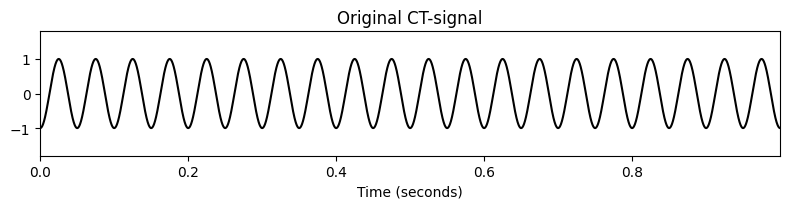

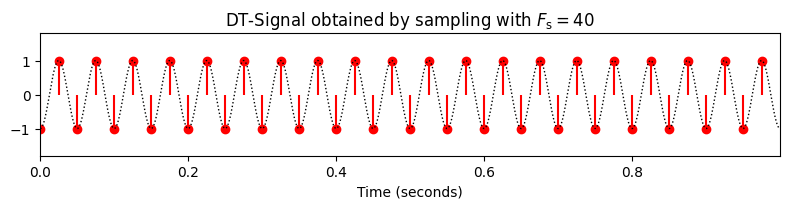

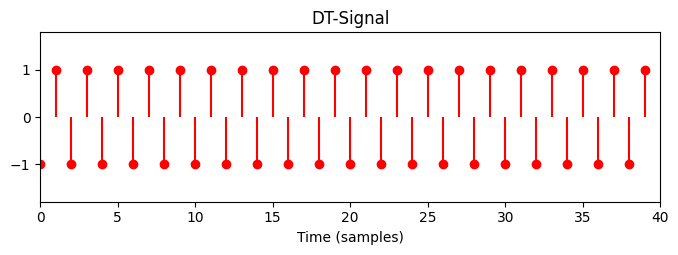

In [6]:
amp = 1
freq = 20
phase = np.deg2rad(90)
x_1, t_1 = generate_sinusoid(dur=1, amp=amp, freq=freq, phase=phase, Fs=10000)


Fs_2 = 40
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
    
plt.figure(figsize=(8, 2.2))
plt.plot(t_1, x_1, 'k')
plt.title('Original CT-signal')
plt.xlabel('Time (seconds)')
plt.ylim([-1.8, 1.8])
plt.xlim([t_1[0], t_1[-1]])
plt.tight_layout()

plt.figure(figsize=(8, 2.2))
plt.stem(t_2, x_2, linefmt='r', markerfmt='ro', basefmt='None')
plt.plot(t_1, x_1, 'k', linewidth=1, linestyle='dotted')
plt.title(r'DT-Signal obtained by sampling with $F_\mathrm{s} = %.0f$' % Fs_2)
plt.xlabel('Time (seconds)')
plt.ylim([-1.8, 1.8])
plt.xlim([t_1[0], t_1[-1]])
plt.tight_layout()

plt.figure(figsize=(8, 2.2))
plt.stem(x_2, linefmt='r', markerfmt='ro', basefmt='None')
plt.title(r'DT-Signal')
plt.xlabel('Time (samples)')
plt.ylim([-1.8, 1.8])
plt.xlim([0, len(t_2)])


In [5]:
# Aquisição de dados

# Arquivo de exemplo da base "CHB-MIT Scalp EEG Database" 
raw = mne.io.read_raw_edf('./../files/chb01_14.edf')

print(raw)
print(raw.info)

raw.plot(duration=4)

Extracting EDF parameters from /home/jplp/Disco X/UFMG/2025/TCC/Códigos/eeg_cs/files/chb01_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<RawEDF | chb01_14.edf, 23 x 921600 (3600.0 s), ~22 KiB, data not loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-07 00:44:37 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: Surrogate>
>


/tmp/ipykernel_160624/1914083444.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('./../files/chb01_14.edf')


Using qt as 2D backend.


QSocketNotifier: Can only be used with threads started with QThread
qt.qpa.wayland: Wayland does not support QWindow::requestActivate()


Traceback (most recent call last):
  File "/home/jplp/Disco X/UFMG/2025/TCC/Códigos/eeg_cs/.venv/lib/python3.12/site-packages/mne_qt_browser/_pg_figure.py", line 2359, in toggle_all
    self.weakmain()._apply_update_projectors(toggle_all=True)
  File "/home/jplp/Disco X/UFMG/2025/TCC/Códigos/eeg_cs/.venv/lib/python3.12/site-packages/mne_qt_browser/_pg_figure.py", line 5113, in _apply_update_projectors
    new_state[applied] = True
    ~~~~~~~~~^^^^^^^^^
IndexError: arrays used as indices must be of integer (or boolean) type
qt.qpa.wayland: Wayland does not support QWindow::requestActivate()
qt.qpa.wayland: Wayland does not support QWindow::requestActivate()
qt.qpa.wayland: Wayland does not support QWindow::requestActivate()
qt.qpa.wayland: Wayland does not support QWindow::requestActivate()
qt.qpa.wayland: Wayland does not support QWindow::requestActivate()
qt.qpa.wayland: Wayland does not support QWindow::requestActivate()
qt.qpa.wayland: Wayland does not support QWindow::requestActiv

Channels marked as bad:
none


Duração do sinal EEG =  3600.0 segundos ou 60.0 minutos


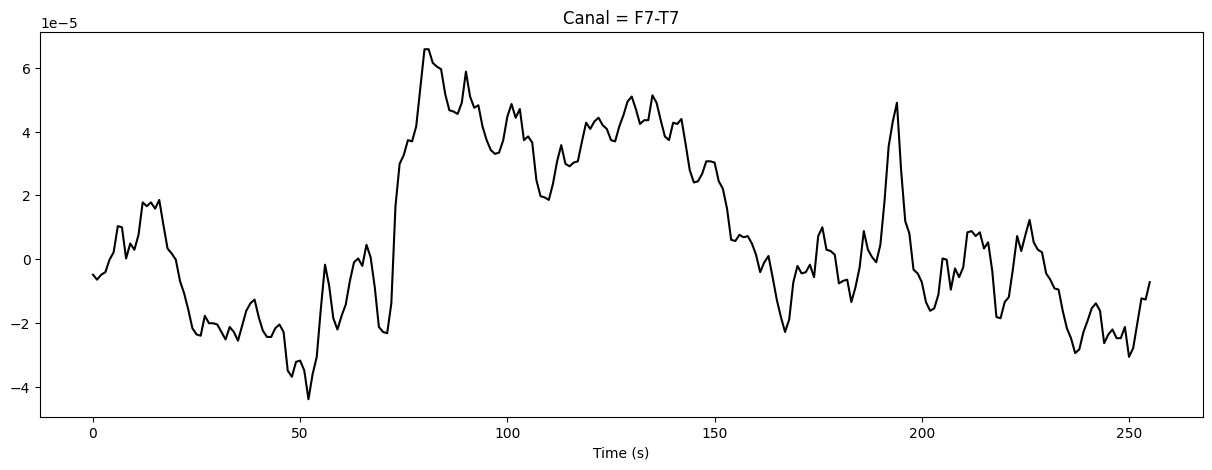

In [10]:
# Captura de uma janela de 4 s de um canal específico

fs = raw.info['sfreq']
N = raw.times.shape[0]

total_duration_in_seconds = N / fs
print('Duração do sinal EEG = ', total_duration_in_seconds, 'segundos ou', round(total_duration_in_seconds / 60, 2), 'minutos')

start_time = 59
end_time = 60

ch_name = raw.ch_names[1]
x = raw.get_data(tmin=start_time, tmax=end_time, picks=(ch_name)).flatten()
t = np.linspace(start_time, end_time, num=x.size)

fig, ax = plt.subplots(figsize=[15, 5])
# ax.plot(t, x, color='black')
ax.plot(x, color='black')

plt.title(f"Canal = {ch_name}")
plt.xlabel('Time (s)')

plt.show()

In [7]:
raw = mne.io.read_raw_edf('./../files/chb01_14.edf')

Extracting EDF parameters from /home/jplp/Disco X/UFMG/2025/TCC/Códigos/eeg_cs/files/chb01_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_18688/1271228973.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('./../files/chb01_14.edf')


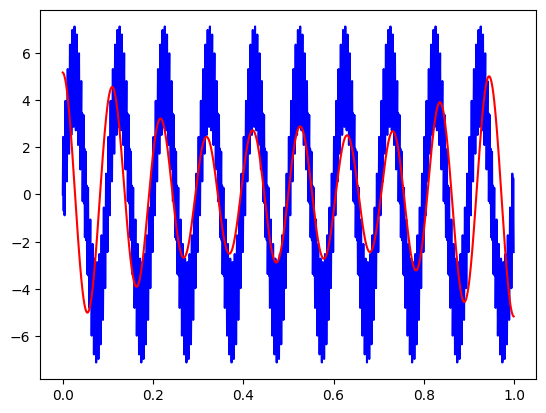

In [11]:
def plot_time_and_discrete_signal(x: np.ndarray, t: np.ndarray, xs: np.ndarray, ts: np.ndarray, Fs: int):
    plt.figure()
    plt.plot(t, x, 'k')
    plt.title('x(t)')
    plt.xlabel('Tempo (s)')
    plt.xlim([t[0], t[-1]])

    plt.figure()
    plt.stem(ts, xs, linefmt='r', markerfmt='ro', basefmt='None')
    plt.plot(t, x, 'k', linewidth=1, linestyle='dotted')
    plt.title(r'x(t), $F_\mathrm{s} = %.0f$ Hz' % Fs)
    plt.xlabel('Tempo (s)')
    plt.xlim([t[0], t[-1]])

    plt.figure()
    plt.stem(xs, linefmt='r', markerfmt='ro', basefmt='None')
    plt.title('x[n]')
    plt.xlabel('Tempo (amostras)')
    plt.xlim([0, len(ts)])

def reconstruction_sinc(x, t, t_hat):
    """Reconstruction from sampled signal using sinc-functions

    Notebook: PCP_08_signal.ipynb

    Args:
        x: Sampled signal
        t: Equidistant discrete time axis (in seconds) of x
        t_hat: Equidistant discrete time axis (in seconds) of signal to be reconstructed

    Returns:
        x_sinc: Reconstructed signal having time axis t_hat
    """
    Fs = 1 / (t[1] - t[0])
    x_sinc = np.zeros(len(t_hat))
    for n in range(0, len(t)):
        x_sinc += x[n] * np.sinc(Fs * t_hat - n)
    return x_sinc

def plot_signal_reconstructed(t, x, ts, xs, x_hat):
    """Plotting three signals

    Notebook: PCP_08_signal.ipynb

    Args:
        t: Time axis of original signal
        x: Original signal
        ts: Time axis for sampled signal
        xs: Sampled signal
        t_hat: Time axis for reconstructed signal
        x_hat: Reconstructed signal
        figsize: Figure size (Default value = (8, 2.2))
    """
    Fs = 1 / (ts[1] - t[0])

    plt.figure()
    plt.plot(t, x, 'k', linewidth=1, linestyle='dotted', label='Sinal original')
    plt.stem(ts, xs, linefmt='r:', markerfmt='r.', basefmt='None', label='Amostras')
    plt.plot(ts, x_hat, 'b', label='Sinal reconstruído')
    plt.title(r'Frequência de amostragem $F_\mathrm{s} = %.0f$' % Fs)
    plt.xlabel('Tempo (s)')
    plt.xlim([t[0], t[-1]])
    plt.legend(loc='upper right', framealpha=1)

# start_time = 0
# end_time = 4
# ch_name = raw.ch_names[1]

# x = raw.get_data(tmin=start_time, tmax=end_time, picks=(ch_name)).flatten()
# t = np.linspace(start_time, end_time, num=x.size)

# Fs = 128
# xs, ts = sampling_equidistant(x, t, Fs)
# plot_time_and_discrete_signal(x, t, xs, ts, Fs)

# t_hat = ts
# x_hat = reconstruction_sinc(x_2, t_2, t_hat)
# plot_signal_reconstructed(t, x, ts, xs, x_hat)


# Generate the three signals using Signal class and its method sine()
Fs = 1000
dur = 1
N = int(Fs * dur)
t = np.arange(N) / Fs
(signal_1hz, _) =  generate_sinusoid(dur=dur, amp=5, freq=10, Fs=Fs)
(signal_20hz, _) = generate_sinusoid(dur=dur, amp=1, freq=200, Fs=Fs)
(signal_10hz, _) = generate_sinusoid(dur=dur, amp=2, freq=400, Fs=Fs)

# Sum the three signals to output the signal we want to analyze
x = signal_1hz + signal_20hz + signal_10hz

# Plot the signal
# plt.figure()
# plt.plot(t, x, 'b')
# plt.xlabel('Tempo (s)')
# plt.ylabel('Amplitude')
# plt.title('Sinal original')


dt = 1 / Fs
freq = np.fft.fftfreq(N, dt)
fourier = np.fft.fft(x)
amplitude = np.abs(fourier) / N
amplitude[1:-1] = 2 * amplitude[1:-1]

# plt.figure()
# plt.plot(freq, amplitude, 'r')
# plt.xlabel('Frequência (Hz)')
# plt.ylabel('Amplitude')
# plt.title('Espectro do sinal')

from scipy import fft 
from scipy.fftpack import dct, idct

dct_signal = dct(x, norm='ortho')

# plt.figure()
# plt.plot(dct_signal, 'g')
# plt.title('DCT do sinal')


def random_matrix(n: int, m: int, *, random_state: int | None = None):
    rng = np.random.default_rng(random_state)
    if m > n:
        raise ValueError("m must be ≤ n for random subsampling.")
    idx = rng.choice(n, m, replace=False)
    P = np.zeros((m, n))
    P[np.arange(m), idx] = 1.0

    return P

compreesion_rate = 0.8
n = len(x)
m = int(n * compreesion_rate)
P = random_matrix(n, m, random_state=42)

y = P @ x
# ts = np.arange(m) / Fs

Psi = dct(np.eye(n))
Theta = P @ Psi


def cosamp(phi, u, s, epsilon=1e-10, max_iter=1000):
    """
    Return an `s`-sparse approximation of the target signal
    Input:
        - phi, sampling matrix
        - u, noisy sample vector
        - s, sparsity
    """
    a = np.zeros(phi.shape[1])
    v = u
    it = 0 # count
    halt = False
    while not halt:
        it += 1
        print("Iteration {}\r".format(it), end="")
        
        y = np.dot(np.transpose(phi), v)
        omega = np.argsort(y)[-(2*s):] # large components
        omega = np.union1d(omega, a.nonzero()[0]) # use set instead?
        phiT = phi[:, omega]
        b = np.zeros(phi.shape[1])
        # Solve Least Square
        b[omega], _, _, _ = np.linalg.lstsq(phiT, u)
        
        # Get new estimate
        b[np.argsort(b)[:-s]] = 0
        a = b
        
        # Halt criterion
        v_old = v
        v = u - np.dot(phi, a)

        halt = (np.linalg.norm(v - v_old) < epsilon) or \
            np.linalg.norm(v) < epsilon or \
            it > max_iter
        
    return a

s = cosamp(Theta,y,3,epsilon=1e-10,max_iter=1000) # CS via matching pursuit
xrecon = idct(s) # reconstruct full signal

plt.figure()
plt.plot(t, x, 'b', label='Original signal')
plt.plot(t, xrecon, 'r')
# #  the FFT on the signal
# fourier = np.fft.fft(signal)
# fourier[1:-1] = 2 * fourier[1:-1] / N
# freq = (Fs * np.arange(N) / N)
# freq[int(N/2):] = freq[int(N/2):] - Fs
# # freq = np.fft.fftfreq(N, 1 / Fs)

# # Plot the result (the spectrum |Xk|)
# plt.figure()
# plt.plot(freq[:int(N/2)], np.abs(fourier)[:int(N/2)])

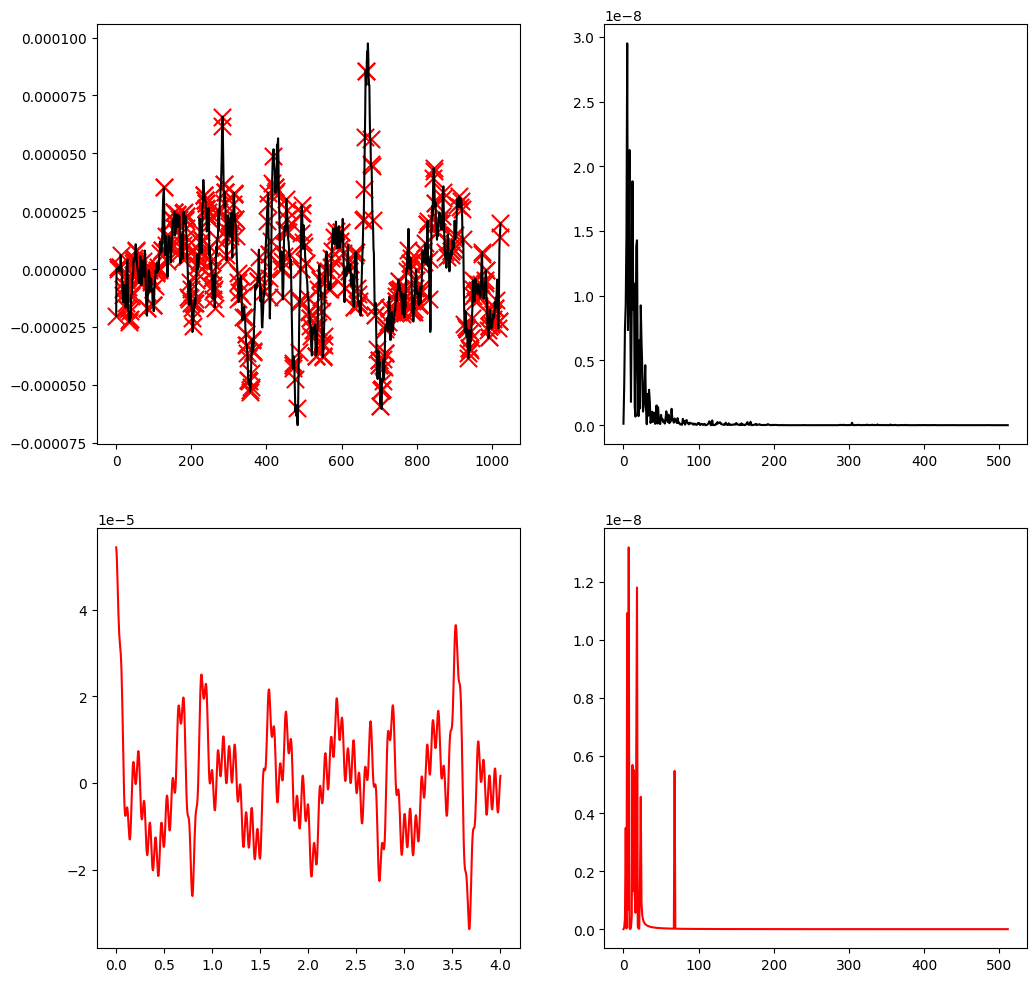

((500,),
 (1024,),
 array([ 152,  220,  423,  664,  317,  424,  749,  741,  998,  857,  258,
          86,  269,  450,  152,  292,  162,  688,  317,  471,   69,  185,
         214,  714,  213,  113,   63,  161,  275,  401,  272,  154, 1004,
         453,  505,  880,  773,  228,  257,   66,  965,  262,   54,  711,
         378,  109,   57,  553,  457,  556,  106,  806,  549,  707,  154,
         492,  177,  451,  345,  992,  850,  806,  516,  332,  107,  133,
         941,   97,   58,   81,  993,  180,  286,  158,  855,  364,  254,
         462,  637,  845,  207,  189,  984,  557,  954,  974,  438,  623,
         892,   28,  595,  216,  513,  261,  379,  683,  563,  689,  995,
          11,  238,  808,  643,  170,  514, 1003,  680,  131,  338,  897,
         998,  947,  189,   78,  145,  516,  532,  325,  756,  517,  255,
         249,  715,  715,  319,   53,  303,  939,  393,  812, 1023,  632,
         761,  312,  851,  716,  784,  489,  598,  920,  771,   38,  334,
          44,  725,

In [ ]:
## Generate signal, DCT of signal

# n = 8192 # points in high resolution signal
# t = np.linspace(0,1,n)
# f1 = 10
# f2 = 20
# f3 = 30
# x = np.cos(2 * f1 * np.pi * t) + np.cos(2 * f2 * np.pi * t) +  np.cos(2 * f3 * np.pi * t)

# start_time = 0
# end_time = 4
# ch_name = raw.ch_names[1]

x = raw.get_data(tmin=start_time, tmax=end_time, picks=(ch_name)).flatten()
t = np.linspace(start_time, end_time, num=x.size)
n = len(x)

xt = np.fft.fft(x) # Fourier transformed signal
PSD = xt * np.conj(xt) / n # Power spectral density

p = 500 # num. random samples, p = n/32
perm = np.floor(np.random.rand(p) * n).astype(int)
y = x[perm]

## Solve compressed sensing problem
Psi = dct(np.identity(n)) # Build Psi
Theta = Psi[perm,:]       # Measure rows of Psi

s = cosamp(Theta,y,10,epsilon=1.e-10,max_iter=10) # CS via matching pursuit
xrecon = idct(s) # reconstruct full signal

## Plot
time_window = np.array([1024,1280])/4096
freq = np.arange(n)
L = int(np.floor(n/2))

fig,axs = plt.subplots(2,2,figsize=(12, 12))
axs = axs.reshape(-1)

axs[1].plot(freq[:L],PSD[:L],color='k')
# axs[1].set_xlim(0, 1024)
# axs[1].set_ylim(0, 1200)

axs[0].plot(t * (1 / (t[1] - t[0])),x,color='k')
axs[0].scatter(perm,y,color='r',marker='x',s=155)
# axs[0].set_xlim(time_window[0],time_window[1])
# axs[0].set_ylim(-2, 2)

axs[2].plot(t,xrecon,color='r')
# axs[2].set_xlim(time_window[0],time_window[1])
# axs[2].set_ylim(-2, 2)

xtrecon = np.fft.fft(xrecon,n) # computes the (fast) discrete fourier transform
PSDrecon = xtrecon * np.conj(xtrecon)/n # Power spectrum (how much power in each freq)

axs[3].plot(freq[:L],PSDrecon[:L],color='r')
# axs[3].set_xlim(0, 1024)
# axs[3].set_ylim(0, 1200)

plt.show()

y.shape, x.shape, (perm)

In [5]:
arr = np.array([1, 2, 3, 4, 5])

arr[arr < 4] = 0
arr

array([0, 0, 0, 4, 5])

In [ ]:
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit

# Generate a sparse signal
n = 256  # Length of the signal
k = 10   # Sparsity (number of non-zero elements)
np.random.seed(42)
x_original = np.zeros(n)
non_zero_indices = np.random.choice(n, k, replace=False)
x_original[non_zero_indices] = np.random.randn(k)

# Generate a random measurement matrix
m = 50  # Number of measurements
phi = np.random.randn(m, n)

# Take measurements
y = phi @ x_original

# Reconstruct the signal using Orthogonal Matching Pursuit (OMP)
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=k)
omp.fit(phi, y)
x_reconstructed = omp.coef_

# Compare the original and reconstructed signals
print("Original signal (non-zero indices):", non_zero_indices)
print("Reconstructed signal (non-zero indices):", np.nonzero(x_reconstructed)[0])

# Plot the original and reconstructed signals
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.stem(x_original)

plt.figure(figsize=(12, 6))
plt.stem(y)

plt.figure(figsize=(12, 6))
plt.stem(x_reconstructed)


# plt.figure(figsize=(12, 6))
# plt.stem(x_original, linefmt='b-', markerfmt='bo', basefmt='r-', label='Original Signal')
# plt.stem(x_reconstructed, linefmt='g--', markerfmt='go', basefmt='r-', label='Reconstructed Signal')
# plt.legend()
# plt.title("Compressed Sensing: Original vs Reconstructed Signal")
# plt.xlabel("Index")
# plt.ylabel("Amplitude")
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.stem(x_original, linefmt='b-', markerfmt='bo', basefmt='r-', label='Original Signal')
# plt.stem(x_reconstructed, linefmt='g--', markerfmt='go', basefmt='r-', label='Reconstructed Signal')
# plt.legend()
# plt.title("Compressed Sensing: Original vs Reconstructed Signal")
# plt.xlabel("Index")
# plt.ylabel("Amplitude")
# plt.show()

In [ ]:
from scipy.fftpack import dct, idct

# Generate a sparse signal
n = 256  # Length of the signal
k = 10   # Sparsity (number of non-zero elements)
np.random.seed(42)
x_original = np.zeros(n)
non_zero_indices = np.random.choice(n, k, replace=False)
x_original[non_zero_indices] = np.random.randn(k)

# Generate a random measurement matrix
m = 50  # Number of measurements
phi = np.random.randn(m, n)

dct(np.identity(3)), dct(np.identity(3), norm='ortho'), np.identity(3)

In [1]:
def generate_matrix_dft(N, K):
    """Generate a DFT (discete Fourier transfrom) matrix

    Notebook: PCP_09_dft.ipynb

    Args:
        N: Number of samples
        K: Number of frequency bins

    Returns:
        dft: The DFT matrix
    """
    dft = np.zeros((K, N), dtype=np.complex128)
    n = np.arange(N)
    for k in range(K):
        dft[k, :] = np.exp(-2j * np.pi * k * n / N)
    return dft

def generate_matrix_dct(N, K):
    dct = np.zeros((K, N), dtype=np.float32)
    n = np.arange(N)
    for k in range(K):
        # dct[k, :] = np.cos((np.pi / N) * (n + 0.5) * k)
        c = 1 # np.sqrt((1 if k == 0 else 2) / N)
        dct[k, :] = c * np.cos((2*n + 1)*k*np.pi / (2*N))
    return dct

In [ ]:
# import scipy 
from scipy import fft 
from scipy.fftpack import dct, idct
import numpy as np
  
signal = [2, 4, 1, 3]
# Using scipy.fft.dct() method 
# fft.dct(signal), np.fft.fft(signal).real

psi = generate_matrix_dft(len(signal), len(signal))

dct_m = generate_matrix_dct(len(signal), len(signal))

# np.dot(fft.dct(np.eye(len(signal))), signal), fft.dct(signal)
# dct_m @ signal, fft.dct(signal), np.array(fft.dct(np.eye(len(signal)))) @ signal

# np.fft.fft(np.eye(len(signal))) @ signal, psi @ signal, np.fft.fft(signal)
dct_m @ signal, dct(np.eye(len(signal)), norm = 'ortho').T @ signal, dct(signal, norm = 'ortho')

(array([10.        ,  0.22417077,  0.        , -3.15432194]),
 array([ 5.        ,  0.15851267,  0.        , -2.2304425 ]),
 array([ 5.        ,  0.15851267,  0.        , -2.2304425 ]))

: 

In [ ]:
class CompressiveSensingMetrics:
    """
    Compute quantitative metrics for signal reconstruction using Compressed Sensing (CS):

    - Compression Ratio (CR):    n/m
    - Percentage Root-Mean-Squared Difference (PRD):  ||x - x_hat||_2^2 / ||x||_2^2 * 100
    - Signal to Noise and Distortion Ratio (SNDR): 10 log10( ||x||_2^2 / ||x - x_hat||_2^2 )
    - Percentage Sparsity (PS):   (N - K) / N * 100

    Attributes:
        x (np.ndarray): Original signal vector.
        x_hat (np.ndarray): Reconstructed signal vector.
        n (int): Length of the signal (N).
        m (int, optional): Number of measurements used (for CR).
        K (int, optional): Sparsity (number of nonzero coefficients) for PS.
        tol (float): Threshold to decide non-zeros if K not provided.
    """
    def __init__(self, x, x_hat, m=None, K=None, tol=1e-12):
        self.x = np.asarray(x).flatten()
        self.x_hat = np.asarray(x_hat).flatten()
        if self.x.shape != self.x_hat.shape:
            raise ValueError("Original and reconstructed signals must have the same shape.")
        self.n = self.x.size
        self.m = m
        self.K = K
        self.tol = tol

    def compression_ratio(self):
        """
        Returns:
            float: Compression Ratio CR = n / m.
        """
        if self.m is None:
            raise ValueError("Number of measurements 'm' must be provided to compute CR.")
        return self.n / self.m

    def prd(self):
        """
        Returns:
            float: Percentage Root-Mean-Squared Difference PRD (%).
        """
        num = np.linalg.norm(self.x - self.x_hat)**2
        den = np.linalg.norm(self.x)**2
        return (num / den) * 100

    def sndr(self):
        """
        Returns:
            float: Signal to Noise and Distortion Ratio SNDR (dB).
        """
        num = np.linalg.norm(self.x)**2
        den = np.linalg.norm(self.x - self.x_hat)**2
        if den == 0:
            return np.inf
        return 10 * np.log10(num / den)

    def percentage_sparsity(self, K=None):
        """
        Args:
            K (int, optional): Number of non-zero coefficients. If not provided, estimated from x_hat using tol.

        Returns:
            float: Percentage Sparsity PS (%).
        """
        K_eff = K if K is not None else self.K
        if K_eff is None:
            # estimate support size
            K_eff = np.count_nonzero(np.abs(self.x_hat) > self.tol)
        return ((self.n - K_eff) / self.n) * 100

In [ ]:
import numpy as np

n = 3
k = 3
I = np.eye(n, dtype=int)

A = np.repeat(I, repeats=k, axis=1)
print(A)

[[1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Optional, Tuple

try:
    import cvxpy as cp
except ImportError:  # graceful degradation if cvxpy unavailable
    cp = None


class CompressedSensingModel:
    """Generic compressed sensing model with unified *fit*, plotting, and helper
    factory methods for common random samplers.

    Key features
    -------------
    * **Unified workflow** – :py:meth:`fit` performs measurement acquisition and
      reconstruction in one step.
    * **Plug‑and‑play components** – user‑supplied sampling operators, sparsity
      transforms, and reconstruction routines.
    * **Ready‑made samplers** – convenience constructors for
      Gaussian i.i.d. sensing matrices (:py:meth:`gaussian_sampler`) and simple
      random‑index subsampling (:py:meth:`random_subsampler`).

    After fitting you can access

    * ``self.y`` – compressed measurements (shape *m*,)
    * ``self.x_hat`` – reconstructed signal (shape *n*,)
    * ``self.x_true`` – ground‑truth signal provided to :py:meth:`fit`

    and visualise with :py:meth:`plot_signals` / :py:meth:`plot_measurements`.
    """

    # ------------------------------------------------------------------
    # Construction
    # ------------------------------------------------------------------
    def __init__(
        self,
        *,
        sampling_matrix: Optional[np.ndarray] = None,
        sample_fn: Optional[Callable[[np.ndarray], np.ndarray]] = None,
        sparsity_transform: Optional[Callable[[np.ndarray], np.ndarray]] = None,
        inverse_transform: Optional[Callable[[np.ndarray], np.ndarray]] = None,
        reconstructor: Optional[Callable[[np.ndarray, Callable[[np.ndarray], np.ndarray], Callable[[np.ndarray], np.ndarray], Callable[[np.ndarray], np.ndarray]], np.ndarray]] = None,
        random_state: Optional[int] = None,
    ):
        if sampling_matrix is None and sample_fn is None:
            raise ValueError("Either sampling_matrix or sample_fn must be provided.")
        if sampling_matrix is not None and sample_fn is not None:
            raise ValueError("Specify only one of sampling_matrix or sample_fn, not both.")

        # Store sampling operator
        self.A = sampling_matrix  # may be None if using functional sampling
        self.sample_fn = sample_fn if sample_fn is not None else lambda x: sampling_matrix @ x

        # Sparsity transform (Psi) and its inverse (Psi_inv)
        if sparsity_transform is None:
            self.Psi = lambda x: x  # identity
            self.Psi_inv = lambda x: x
        else:
            if inverse_transform is None:
                raise ValueError("inverse_transform must accompany sparsity_transform.")
            self.Psi = sparsity_transform
            self.Psi_inv = inverse_transform

        # Reconstruction routine
        if reconstructor is None:
            if cp is None:
                raise ImportError(
                    "cvxpy is required for the default Basis Pursuit reconstructor. "
                    "Install cvxpy or supply a custom reconstructor."
                )
            reconstructor = self._basis_pursuit
        self.reconstructor = reconstructor

        self.random_state = random_state

        # Runtime placeholders
        self._fitted = False
        self.y: Optional[np.ndarray] = None
        self.x_true: Optional[np.ndarray] = None
        self.x_hat: Optional[np.ndarray] = None

    # ------------------------------------------------------------------
    # Unified API
    # ------------------------------------------------------------------
    def fit(self, x: np.ndarray, **recon_kwargs) -> np.ndarray:
        """Acquire measurements *and* reconstruct the signal.

        Parameters
        ----------
        x : np.ndarray
            Ground‑truth signal to be sensed and reconstructed.
        **recon_kwargs
            Extra keyword arguments forwarded to the ``reconstructor``.

        Returns
        -------
        np.ndarray
            Reconstructed signal ``x_hat``.
        """
        self.x_true = x.copy()
        self.y = self.sample_fn(x)
        self.x_hat = self.reconstructor(self.y, self.sample_fn, self.Psi, self.Psi_inv, **recon_kwargs)
        self._fitted = True
        return self.x_hat

    # ------------------------------------------------------------------
    # Plotting helpers
    # ------------------------------------------------------------------
    def plot_signals(
        self,
        *,
        show_difference: bool = False,
        show: bool = True,
        figsize: Tuple[int, int] = (10, 4),
        title: Optional[str] = None,
    ) -> plt.Figure:
        """Plot original vs reconstructed signal (and optionally the error)."""
        if not self._fitted:
            raise RuntimeError("Call fit() before plotting.")
        fig, ax = plt.subplots(figsize=figsize)
        ax.plot(self.x_true, label="Original", linewidth=1)
        ax.plot(self.x_hat, label="Reconstruction", linestyle="--", linewidth=1)
        if title is not None:
            ax.set_title(title)
        ax.set_xlabel("Sample index")
        ax.set_ylabel("Amplitude")
        ax.legend()

        if show_difference:
            diff_ax = ax.twinx()
            diff = self.x_true - self.x_hat
            diff_ax.plot(diff, label="Error", alpha=0.3)
            diff_ax.set_ylabel("Error")
            diff_ax.legend(loc="upper right")
        if show:
            plt.show()
        return fig

    def plot_measurements(
        self,
        *,
        show: bool = True,
        stem: bool = True,
        figsize: Tuple[int, int] = (8, 3),
        title: str = "Compressed measurements |y|",
    ) -> plt.Figure:
        """Visualise the measurement vector magnitude."""
        if not self._fitted:
            raise RuntimeError("Call fit() before plotting.")
        fig, ax = plt.subplots(figsize=figsize)
        if stem:
            markerline, stemlines, baseline = ax.stem(np.abs(self.y), use_line_collection=True)
            plt.setp(markerline, linewidth=0)
            plt.setp(stemlines, linewidth=0.8)
        else:
            ax.plot(np.abs(self.y))
        ax.set_xlabel("Measurement index")
        ax.set_ylabel("|y|")
        ax.set_title(title)
        if show:
            plt.show()
        return fig

    # ------------------------------------------------------------------
    # Default reconstructor – Basis Pursuit (ℓ₁)
    # ------------------------------------------------------------------
    def _basis_pursuit(
        self,
        y: np.ndarray,
        sample_fn: Callable[[np.ndarray], np.ndarray],
        Psi: Callable[[np.ndarray], np.ndarray],
        Psi_inv: Callable[[np.ndarray], np.ndarray],
        *,
        max_iter: int = 1_000,
        tol: float = 1e-5,
    ) -> np.ndarray:
        """Solve Basis Pursuit via cvxpy (matrix‑based sampling only)."""
        if self.A is None:
            raise NotImplementedError(
                "Basis Pursuit default reconstructor supports only matrix‑based sampling."
            )
        A = self.A
        m, n = A.shape
        s = cp.Variable(n)
        objective = cp.Minimize(cp.norm1(s))
        constraints = [A @ Psi_inv(s) == y]
        prob = cp.Problem(objective, constraints)
        prob.solve(verbose=False, max_iters=max_iter, abstol=tol)
        if prob.status not in {cp.OPTIMAL, cp.OPTIMAL_INACCURATE}:
            raise RuntimeError(f"Basis Pursuit did not converge: {prob.status}")
        return Psi_inv(s.value)

    # ------------------------------------------------------------------
    # Factory shortcuts
    # ------------------------------------------------------------------
    @staticmethod
    def gaussian_sampler(m: int, n: int, *, random_state: Optional[int] = None) -> "CompressedSensingModel":
        """Factory: Gaussian i.i.d. sampling matrix (default reconstructor)."""
        rng = np.random.default_rng(random_state)
        A = rng.standard_normal((m, n)) / np.sqrt(m)
        return CompressedSensingModel(sampling_matrix=A, random_state=random_state)

    @staticmethod
    def random_subsampler(m: int, n: int, *, random_state: Optional[int] = None) -> "CompressedSensingModel":
        """Factory: random‑index subsampling (measurement picks *m* entries of *x*).

        The sampling operator is a binary selection matrix *P* (shape *m×n*) that
        keeps *m* randomly chosen indices.  Because ``P`` is very sparse we let
        NumPy handle the multiplication efficiently rather than relying on an
        explicit function.
        """
        rng = np.random.default_rng(random_state)
        if m > n:
            raise ValueError("m must be ≤ n for random subsampling.")
        idx = rng.choice(n, m, replace=False)
        P = np.zeros((m, n))
        P[np.arange(m), idx] = 1.0
        # sample_fn could simply be lambda x: x[idx], but we pass the matrix so
        # that the default Basis Pursuit routine remains available.
        return CompressedSensingModel(sampling_matrix=P, random_state=random_state)


# ----------------------------------------------------------------------
# Example usage (executed only when run as a script)
# ----------------------------------------------------------------------
if __name__ == "__main__":
    N = 1024  # signal dimension
    M = 256   # number of measurements

    # Create sparse signal in DCT domain
    from scipy.fftpack import dct, idct
    rng = np.random.default_rng(0)
    coeffs = np.zeros(N)
    k = 40
    coeffs[rng.choice(N, k, replace=False)] = rng.standard_normal(k)
    x = idct(coeffs, norm="ortho")

    # -------------------- Gaussian sampler --------------------
    model_gauss = CompressedSensingModel.gaussian_sampler(M, N, random_state=0)
    model_gauss.Psi = lambda z: dct(z, norm="ortho")
    model_gauss.Psi_inv = lambda z: idct(z, norm="ortho")

    x_hat_gauss = model_gauss.fit(x)
    err_gauss = np.linalg.norm(x - x_hat_gauss) / np.linalg.norm(x)
    print(f"Gaussian sampler relative error: {err_gauss:.2e}")

    # -------------------- Random subsampler -------------------
    model_sub = CompressedSensingModel.random_subsampler(M, N, random_state=1)
    model_sub.Psi = model_gauss.Psi
    model_sub.Psi_inv = model_gauss.Psi_inv

    x_hat_sub = model_sub.fit(x)
    err_sub = np.linalg.norm(x - x_hat_sub) / np.linalg.norm(x)
    print(f"Random subsampler relative error: {err_sub:.2e}")

    # Visualise one of the reconstructions
    model_sub.plot_signals(show_difference=True, title="Random Subsampling Reconstruction")


In [ ]:
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

# Building a class Fourier for better use of Fourier Analysis.
class Fourier:
  """
  Apply the Discrete Fourier Transform (DFT) on the signal using the Fast Fourier 
  Transform (FFT) from the scipy package.

  Example:
    fourier = Fourier(signal, sampling_rate=2000.0)
  """

  def __init__(self, signal, sampling_rate):
    """
    Initialize the Fourier class.

    Args:
        signal (np.ndarray): The samples of the signal
        sampling_rate (float): The sampling per second of the signal

    Additional parameters,which are required to generate Fourier calculations, are
    calculated and defined to be initialized here too:
        time_step (float): 1.0/sampling_rate
        time_axis (np.ndarray): Generate the time axis from the duration and
                              the time_step of the signal. The time axis is
                              for better representation of the signal.
        duration (float): The duration of the signal in seconds.
        frequencies (numpy.ndarray): The frequency axis to generate the spectrum.
        fourier (numpy.ndarray): The DFT using rfft from the scipy package.
    """
    self.signal = signal
    self.sampling_rate = sampling_rate
    self.time_step = 1.0/self.sampling_rate
    self.duration = len(self.signal)/self.sampling_rate
    self.time_axis = np.arange(0, self.duration, self.time_step)
    self.frequencies = rfftfreq(len(self.signal), d = self.time_step)
    self.fourier = rfft(self.signal)

  # Generate the actual amplitudes of the spectrum
  def amplitude(self):
    """
    Method of Fourier

    Returns:
        numpy.ndarray of the actual amplitudes of the sinusoids.
    """
    return 2*np.abs(self.fourier)/len(self.signal)

  # Generate the phase information from the output of rfft  
  def phase(self, degree = False):
    """
    Method of Fourier

    Args:
        degree: To choose the type of phase representation (Radian, Degree).
                By default, it's in radian. 

    Returns:
        numpy.ndarray of the phase information of the Fourier output.
    """
    return np.angle(self.fourier, deg = degree)

  # Plot the spectrum
  def plot_spectrum(self, interactive=False):
    """
    Plot the Spectrum (Frequency Domain) of the signal either using the matplotlib
    package, or plot it interactive using the plotly package.

    Args:
        interactive: To choose if you want the plot interactive (True), or not
        (False). The default is the spectrum non-interactive.

    Retruns:
        A plot of the spectrum.
    """
    # When the argument interactive is set to True:
    if interactive:
      self.trace = go.Line(x=self.frequencies, y=self.amplitude())
      self.data = [self.trace]
      self.layout = go.Layout(title=dict(text='Spectrum',
                                         x=0.5,
                                         xanchor='center',
                                         yanchor='top',
                                         font=dict(size=25, family='Arial, bold')),
                              xaxis=dict(title='Frequency[Hz]'),
                              yaxis=dict(title='Amplitude'))
      self.fig = go.Figure(data=self.data, layout=self.layout)
      return self.fig.show()
    # When the argument interactive is set to False:
    else:
      plt.figure(figsize = (10,6))
      plt.plot(self.frequencies, self.amplitude())
      plt.title('Spectrum')
      plt.ylabel('Amplitude')
      plt.xlabel('Frequency[Hz]')

  # Plot the Signal and the Spectrum interactively
  def plot_time_frequency(self, t_ylabel="Amplitude", f_ylabel="Amplitude",
                          t_title="Signal (Time Domain)",
                          f_title="Spectrum (Frequency Domain)"):
    """
    Plot the Signal in Time Domain and Frequency Domain using plotly.

    Args:
        t_ylabel (String): Label of the y-axis in Time-Domain
        f_ylabel (String): Label of the y-axis in Frequency-Domain
        t_title (String): Title of the Time-Domain plot
        f_title (String): Title of the Frequency-Domain plot 

    Returns:
        Two figures: the first is the time-domain, and the second is the
                     frequency-domain.
    """
    # The Signal (Time-Domain)
    self.time_trace = go.Line(x=self.time_axis, y=self.signal)
    self.time_domain = [self.time_trace]
    self.layout = go.Layout(title=dict(text=t_title,
                                       x=0.5,
                                       xanchor='center',
                                       yanchor='top',
                                       font=dict(size=25, family='Arial, bold')),
                            xaxis=dict(title='Time[sec]'),
                            yaxis=dict(title=t_ylabel),
                            width=1000,
                            height=400)
    fig = go.Figure(data=self.time_domain, layout=self.layout)
    fig.show()
    # The Spectrum (Frequency-Domain)
    self.freq_trace = go.Line(x=self.frequencies, y=self.amplitude())
    self.frequency_domain = [self.freq_trace]
    self.layout = go.Layout(title=dict(text=f_title,
                                       x=0.5,
                                       xanchor='center',
                                       yanchor='top',
                                       font=dict(size=25, family='Arial, bold')),
                            xaxis=dict(title='Frequency[Hz]'),
                            yaxis=dict(title=f_ylabel),
                            width=1000,
                            height=400)
    fig = go.Figure(data=self.frequency_domain, layout=self.layout)
    fig.show()

In [34]:
# Generate the three signals using Signal class and its method sine()
Fs = 1000
dur = 1
N = int(Fs * dur)
t = np.arange(N) / Fs
(signal_1hz, _) =  generate_sinusoid(dur=dur, amp=5, freq=50, Fs=Fs)
(signal_20hz, _) = generate_sinusoid(dur=dur, amp=1, freq=150, Fs=Fs)
(signal_10hz, _) = generate_sinusoid(dur=dur, amp=2, freq=100, Fs=Fs)


raw = mne.io.read_raw_edf('./../files/chb01_14.edf')
# Captura de uma janela de 1s de um canal específico
Fs = raw.info['sfreq']
start_time = 59
end_time = 60

ch_name = raw.ch_names[1]
x = raw.get_data(tmin=start_time, tmax=end_time, picks=(ch_name)).flatten()
n = x.size
t = np.linspace(start_time, end_time, num=n)

# Sum the three signals to output the signal we want to analyze
signal = x#signal_1hz + signal_20hz + signal_10hz

# Apply the DFT using the class Fourier
fourier = Fourier(signal, sampling_rate=Fs)
# Plot the spectrum interactively using the class Fourier
fourier.plot_spectrum(interactive=True)
fourier.plot_time_frequency(t_ylabel="Amplitude", f_ylabel="Amplitude",
                            t_title="Signal (Time Domain)",
                            f_title="Spectrum (Frequency Domain)")

Extracting EDF parameters from /home/jplp/Disco X/UFMG/2025/TCC/Códigos/eeg_cs/files/chb01_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_160624/3606597351.py:11: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.

